# **Autoencoders**

* An autoencoder is a neural network that is trained to produce as output a duplicate of its input

* The network may be viewed as consisting of two parts:
  * An encoder that maps the original input x into a latent space z that is called Code (of the input): z = f(x)
    
  * A decoder that produces a reconstruction r = g(z)

* The goal is to generate an output as close as possible to the original input: x ≈ r

* The loss function is expressed as L(x, g(f(x))

* For instance, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image.

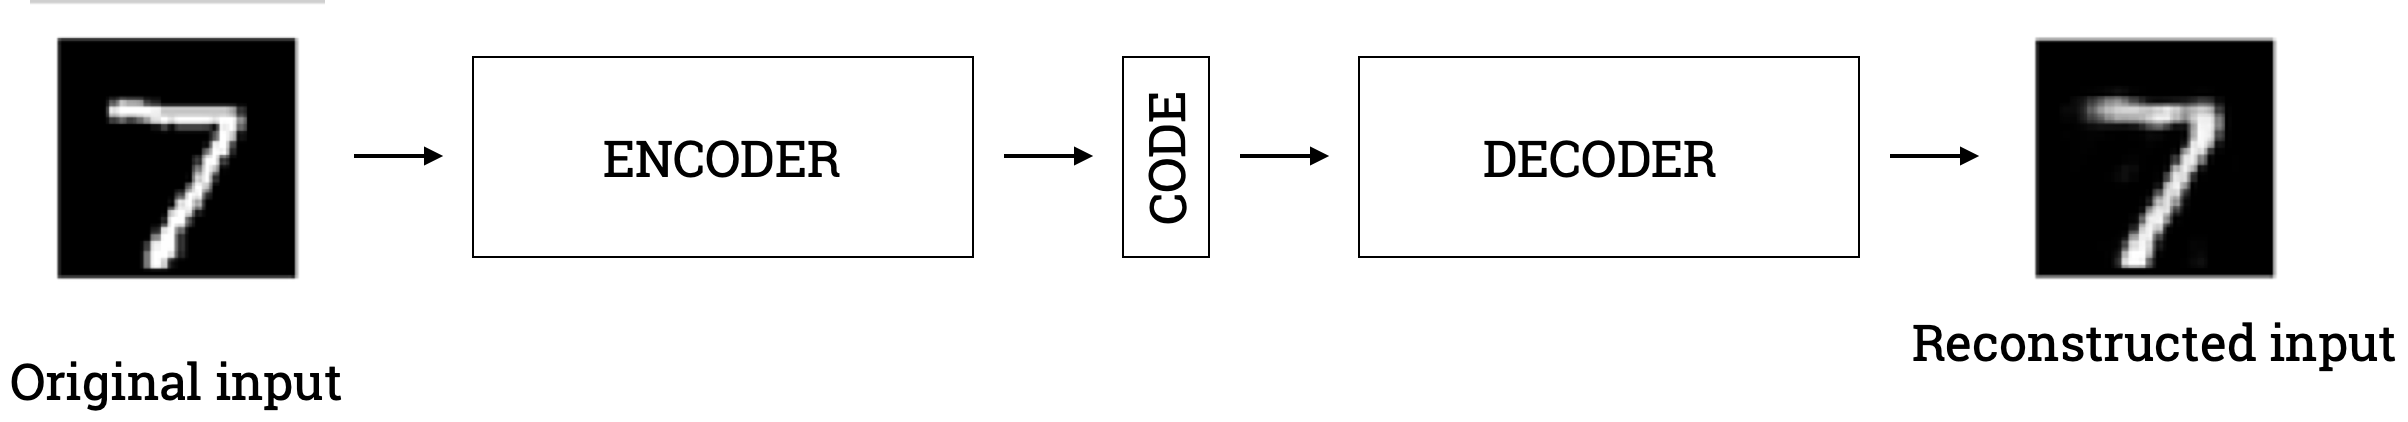

* An autoencoder learns to compress the data while minimizing the reconstruction error.


* The code of an autoencoder can have useful information about the input domain

* An autoencoder whose code size is lower than the input one is called under-complete

* An autoencoder whose code size is bigger than the input one is called over-complete

* We'll start with a simple autoencoder, with a single fully-connected neural layer as encoder and as decoder

* We will use Fashion MNIST dataset

* Each image in this dataset is 28x28 pixels

* Let's prepare our input data.

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


* We're discarding the labels (since we're only interested in encoding/decoding the input images).

* We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [3]:
import numpy as np

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val = train_test_split(x_train, random_state = 42)

In [5]:
print(x_train.shape)
print(x_val.shape)

(45000, 784)
(15000, 784)


* Now we will build the simple autoencoder

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
# 32 floats -> compression of factor that is equal to input / 32
# In our case we have a compression of factor 24.5

encoding_dim = 32

input_img = Input(shape=(x_train.shape[1],))
# "code" is the encoded representation of the input
code = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(x_train.shape[1], activation='sigmoid')(code)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded, name = 'simple_autoencoder')

In [8]:
autoencoder.summary()

Model: "simple_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Se avessimo avuto un one hot encoded  input, avremmo dovuto usare una categorical cross entropy come loss function.

In [9]:
autoencoder.compile(optimizer='rmsprop', loss='mse')

* Now let's train our autoencoder:

In [12]:
EPOCHS = 20
BATCH_SIZE = 276

history = autoencoder.fit(x_train, x_train, epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, x_val))

Epoch 1/20
164/164 [==============================] - 1s 7ms/step - loss: 0.0142 - val_loss: 0.0160
Epoch 2/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0141 - val_loss: 0.0155
Epoch 3/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0140 - val_loss: 0.0152
Epoch 4/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0140 - val_loss: 0.0147
Epoch 5/20
164/164 [==============================] - 1s 6ms/step - loss: 0.0139 - val_loss: 0.0137
Epoch 6/20
164/164 [==============================] - 1s 7ms/step - loss: 0.0138 - val_loss: 0.0144
Epoch 7/20
164/164 [==============================] - 1s 6ms/step - loss: 0.0138 - val_loss: 0.0143
Epoch 8/20
164/164 [==============================] - 1s 6ms/step - loss: 0.0137 - val_loss: 0.0146
Epoch 9/20
164/164 [==============================] - 1s 6ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 10/20
164/164 [==============================] - 1s 6ms/step - loss: 0.0136 - val_loss: 0.0140

In [14]:
import matplotlib.pyplot as plt

In [15]:
def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center')
    plt.show()

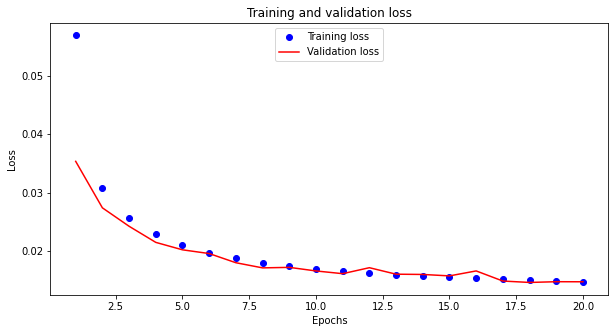

In [ ]:
plot_loss(history)

* We can see the reconstructed images

In [16]:
reconstructed = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
def plotImage(x_test, reconstructed):
  n = 10  # how many images we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(reconstructed[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

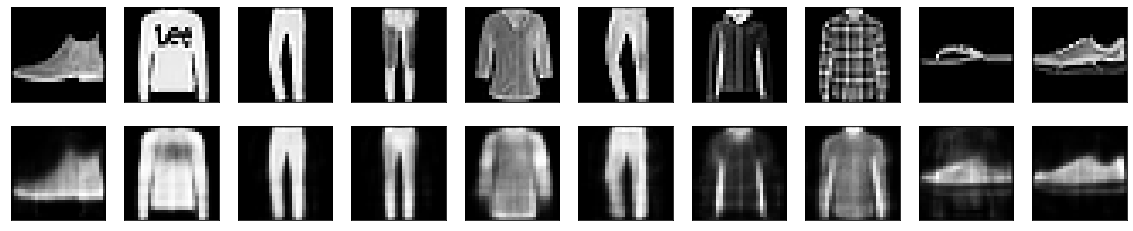

In [ ]:
plotImage(x_test, reconstructed)

Si vede che c'è una perdita di informazioni, ma rispetto allo latent space abbiamo una dimensionalità molto minore. 

* If a single hidden layer is not enough, we can extend the autoencoder along the depth dimension.

In [ ]:
hidden_size = 64
encoding_dim = 32

input_img = Input(shape=(x_train.shape[1],))
hidden1 = Dense(hidden_size, activation='relu')(input_img)
code = Dense(encoding_dim, activation='relu')(hidden1)

hidden2 = Dense(hidden_size, activation='relu')(code)
out = Dense(784, activation='sigmoid')(hidden2)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, out, name = 'multilayed_autoencoder')

autoencoder.summary()

autoencoder.compile(optimizer='rmsprop', loss='mse')

Model: "multilayed_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = autoencoder.fit(x_train, x_train, epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, x_val))

Epoch 1/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0564 - val_loss: 0.0381
Epoch 2/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0326 - val_loss: 0.0319
Epoch 3/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0277 - val_loss: 0.0276
Epoch 4/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0252 - val_loss: 0.0245
Epoch 5/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0235 - val_loss: 0.0223
Epoch 6/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0222 - val_loss: 0.0214
Epoch 7/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0211 - val_loss: 0.0211
Epoch 8/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0203 - val_loss: 0.0197
Epoch 9/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0196 - val_loss: 0.0196
Epoch 10/20
176/176 [==============================] - 2s 9ms/step - loss: 0.0189 - val_loss: 0.0187

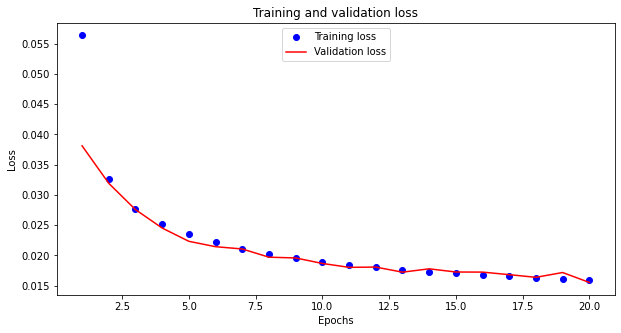

In [ ]:
plot_loss(history)

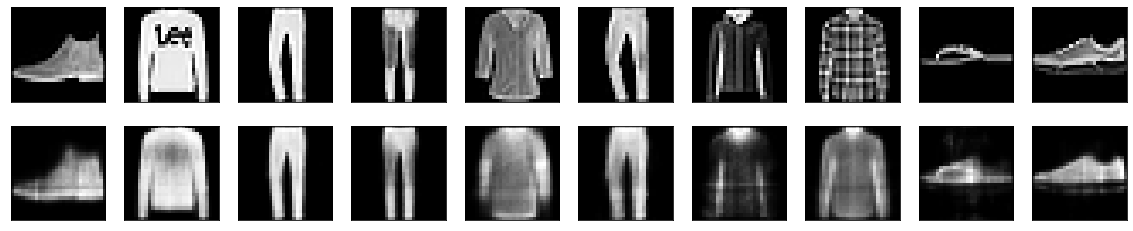

In [ ]:
reconstructed = autoencoder.predict(x_test)

plotImage(x_test, reconstructed)

## Cosa succede con layer convoluzionali?

* Let's try with a convolutional approach

In [18]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_img = Input(shape=(28, 28, 1))

conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 8
#Ricorda che MaxPooling è downsampling
pool1 = MaxPooling2D((2, 2))(conv1) #14 x 14 x 8
conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 16

#decoder
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2) # 14 x 14 x 16
#Ricorda che UpSampling è upsampling
up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 16
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded, name = 'convolutional_autoencoder')

autoencoder.summary()

autoencoder.compile(optimizer='rmsprop', loss='mse')

Model: "convolutional_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 28, 28, 16)       0         
 )                                       

In [21]:
history = autoencoder.fit(x_train, x_train,
                          epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, x_val))

Epoch 1/20
164/164 [==============================] - 3s 17ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 2/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 3/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 4/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 6/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 8/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 9/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 10/20
164/164 [==============================] - 2s 14ms/step - loss: 0.0026 - val_lo

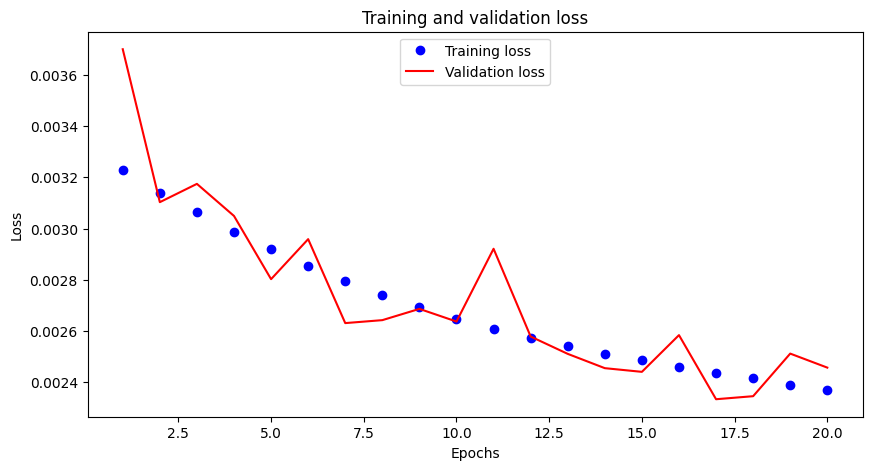

In [22]:
plot_loss(history)

313/313 [==============================] - 1s 3ms/step


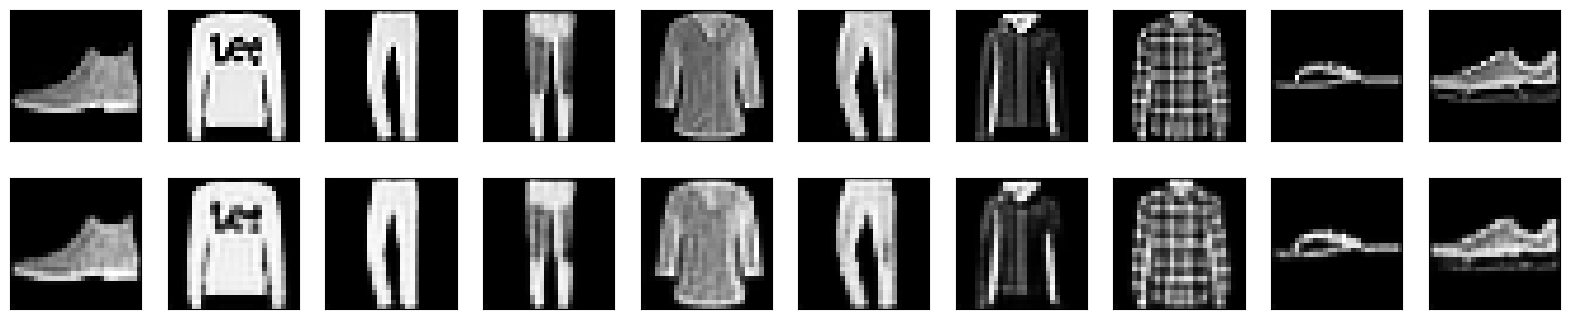

In [23]:
reconstructed = autoencoder.predict(x_test)

plotImage(x_test, reconstructed)

* Regularized autoencoder allows to prevent that the autoencoders learn the identity function and to improve their ability to capture important information and learn richer representations

* In fact, it ideally enables to choose the code size and the capacity of the encoder and decoder according to the complexity of the input data distribution

* To achieve this we have to change the loss function

* The new loss function encourages the model to have other properties besides the ability to copy its input, e.g.:
  * sparsity of the representation
  * robustness to noise or to missing inputs

* Short list of regularized autoencoders:
  * Sparse Autoencoders
  * Denoising Autoencoders



* Sparse Autoencoders add a sparsity penalty on the code layer to the loss function: L(x, g(f(x)) + Ω(z)

  * The component Ω(z) penalizes the activations of too many nodes in the code layer
  * This constraint is called the sparsity constraint. It is sparse because each unit only activates to a certain type of inputs, not all of them

* In Keras, this can be done by adding an activity_regularizer to our Dense layer:

In [24]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [25]:
from tensorflow.keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
code = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(code)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

autoencoder.compile(optimizer='rmsprop', loss='mse')


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = autoencoder.fit(x_train, x_train, epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          validation_data=(x_val, x_val))

Epoch 1/20
164/164 [==============================] - 2s 9ms/step - loss: 0.0650 - val_loss: 0.0430
Epoch 2/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0349 - val_loss: 0.0362
Epoch 3/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0288 - val_loss: 0.0272
Epoch 4/20
164/164 [==============================] - 1s 6ms/step - loss: 0.0258 - val_loss: 0.0248
Epoch 5/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0240 - val_loss: 0.0234
Epoch 6/20
164/164 [==============================] - 1s 6ms/step - loss: 0.0228 - val_loss: 0.0225
Epoch 7/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0219 - val_loss: 0.0215
Epoch 8/20
164/164 [==============================] - 1s 6ms/step - loss: 0.0212 - val_loss: 0.0235
Epoch 9/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 10/20
164/164 [==============================] - 1s 5ms/step - loss: 0.0202 - val_loss: 0.0205

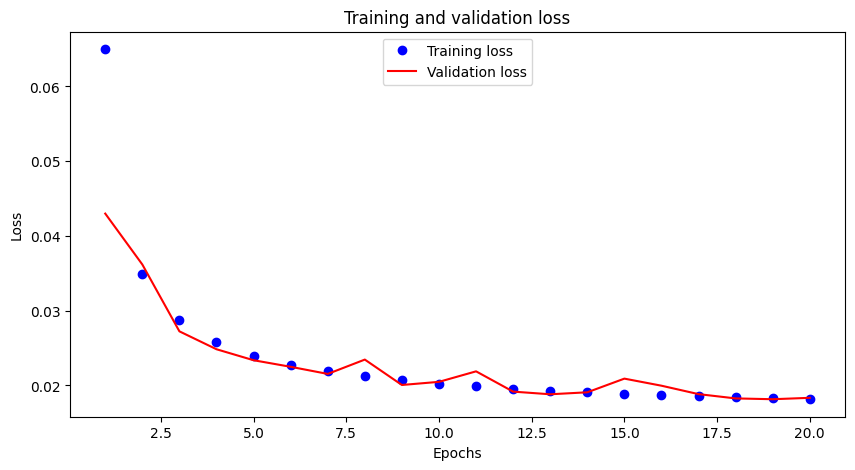

In [27]:
plot_loss(history)

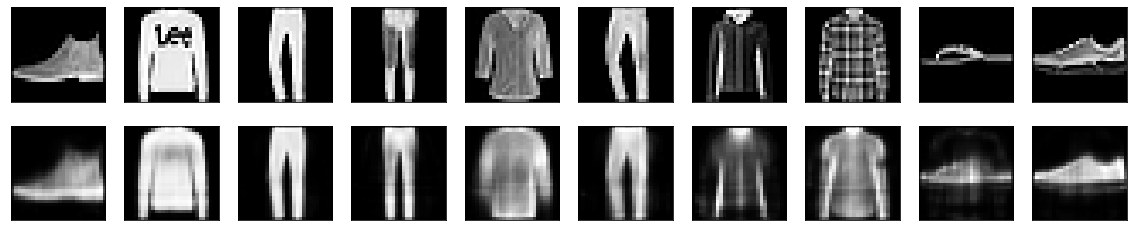

In [ ]:
reconstructed = autoencoder.predict(x_test)

plotImage(x_test, reconstructed)

# Noisy case

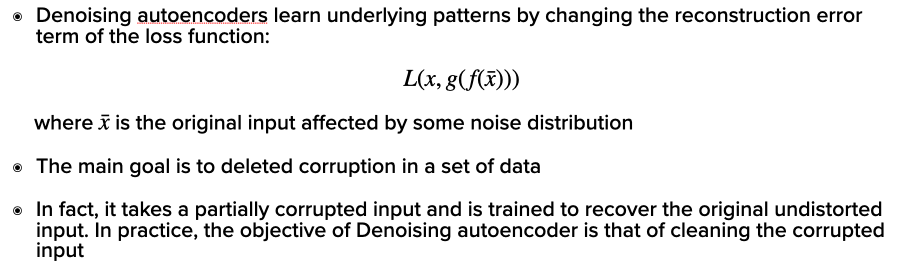

* Adding random noise to the images

In [28]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [29]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_val_noisy = x_val + noise_factor * tf.random.normal(shape=x_val.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_val_noisy = tf.clip_by_value(x_val_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

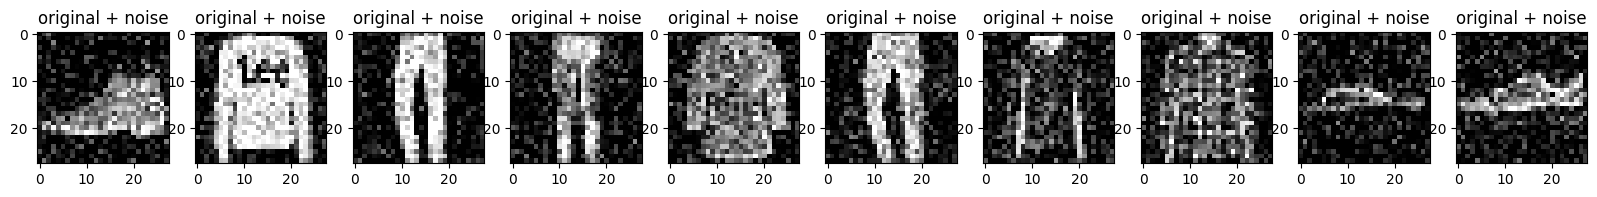

In [30]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(x_test_noisy[i].numpy().reshape(28,28))
    plt.gray()
plt.show()

In [31]:
input_img = Input(shape=(28, 28, 1))

conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 8
pool1 = MaxPooling2D((2, 2))(conv1) #14 x 14 x 8
conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 16

#decoder
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2) # 14 x 14 x 16
up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 16
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded, name = 'convolutional_autoencoder')

autoencoder.summary()

autoencoder.compile(optimizer='rmsprop', loss='mse')

Model: "convolutional_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 16)       0         
 2D)                                     

In [32]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=EPOCHS, batch_size = BATCH_SIZE,
                validation_data=(x_val_noisy, x_val))

Epoch 1/20
164/164 [==============================] - 4s 18ms/step - loss: 0.0358 - val_loss: 0.0201
Epoch 2/20
164/164 [==============================] - 2s 15ms/step - loss: 0.0164 - val_loss: 0.0153
Epoch 3/20
164/164 [==============================] - 2s 15ms/step - loss: 0.0138 - val_loss: 0.0127
Epoch 4/20
164/164 [==============================] - 2s 15ms/step - loss: 0.0123 - val_loss: 0.0112
Epoch 5/20
164/164 [==============================] - 2s 15ms/step - loss: 0.0112 - val_loss: 0.0116
Epoch 6/20
164/164 [==============================] - 2s 15ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 7/20
164/164 [==============================] - 2s 15ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 8/20
144/164 [=========================>....] - ETA: 0s - loss: 0.0095

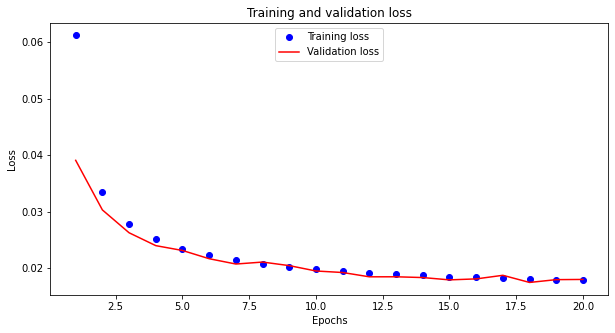

In [ ]:
plot_loss(history)

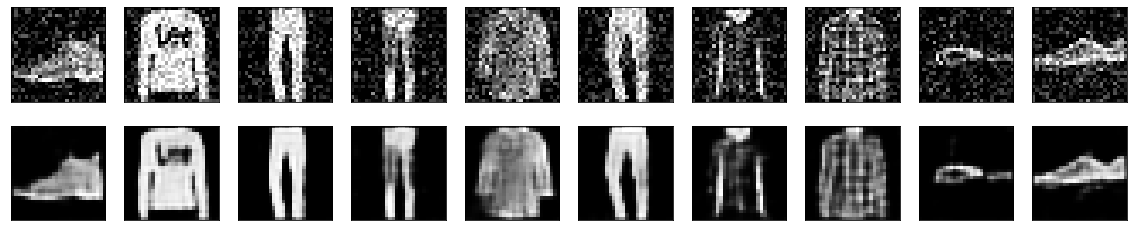

In [ ]:
reconstructed = autoencoder.predict(x_test_noisy)

plotImage(x_test_noisy.numpy(), reconstructed)